In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/find_best.csv')

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']

df

,pin,size,threads,runtime,runtimestd,usertime,usertimestd,energy,energystd,MFLOP/J,GFLOP/s
0,True,500,1,0.434085,0.001332,0.434076,0.001334,6.515842,0.077542,38.329661,0.575348
1,True,500,2,0.217360,0.000072,0.433937,0.000081,3.999580,0.036044,62.444063,1.149015
2,True,500,3,0.149344,0.005693,0.434641,0.001126,3.293203,0.133910,75.838016,1.672316
3,True,500,4,0.109488,0.000534,0.434178,0.000172,2.746944,0.013692,90.919228,2.281076
4,True,500,5,0.105253,0.000992,0.519216,0.000419,2.711250,0.014665,92.116170,2.372845
...,...,...,...,...,...,...,...,...,...,...,...
155,False,1500,12,1.888229,0.087515,22.390977,1.052872,77.879575,3.851304,86.643385,3.573586
156,False,1500,13,1.898345,0.024755,24.370997,0.185640,77.602338,0.720838,86.952921,3.554543
157,False,1500,14,1.954577,0.016888,26.990215,0.218087,79.690104,0.708924,84.674881,3.452282
158,False,1500,15,2.101925,0.018372,31.046623,0.167127,84.126711,0.730475,80.209364,3.210271


In [6]:
df_grouped = df.groupby(['size', 'pin'])

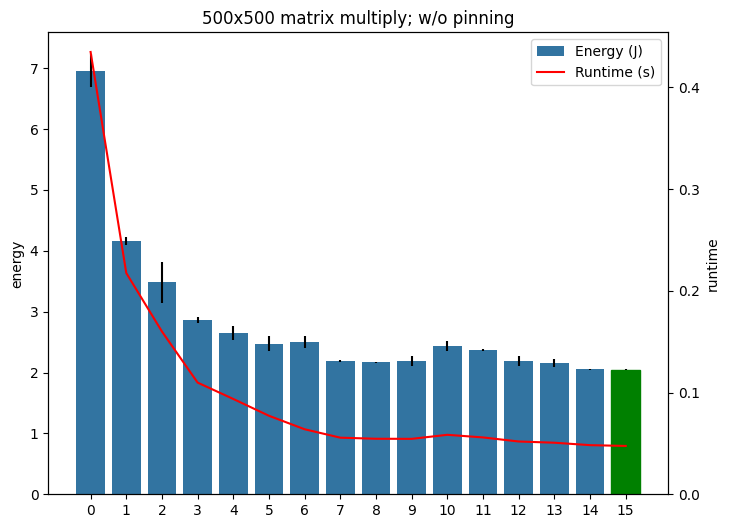

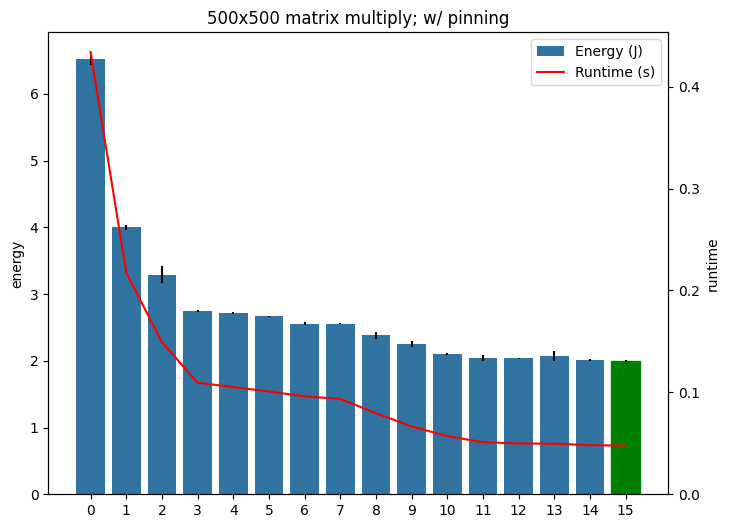

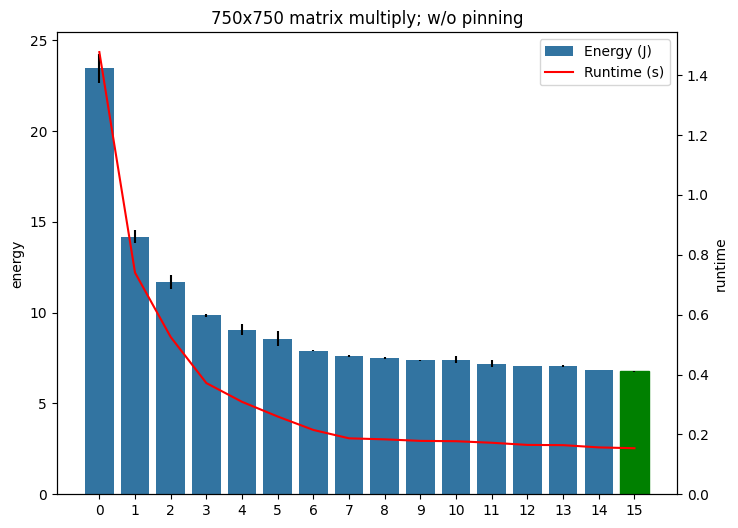

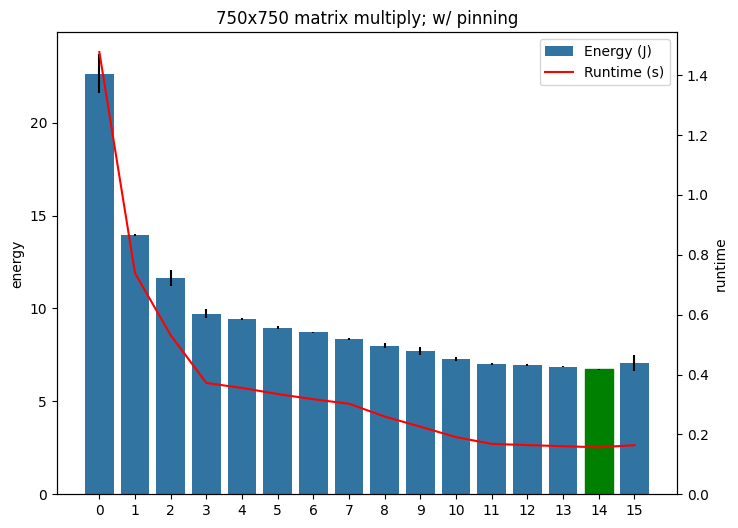

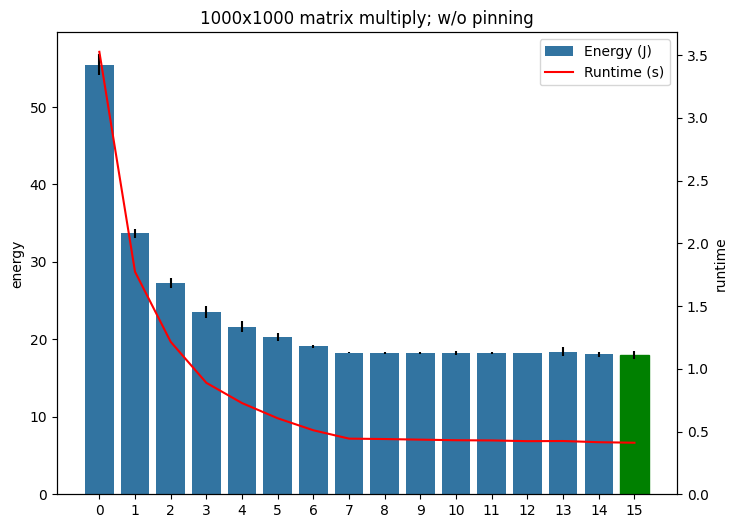

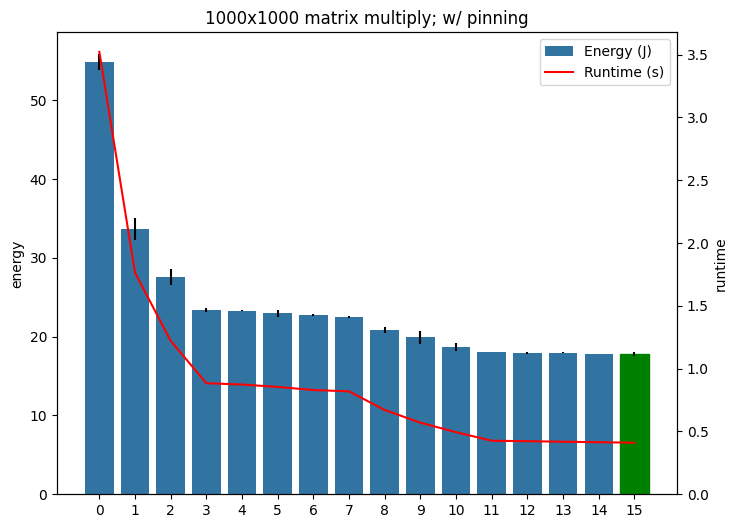

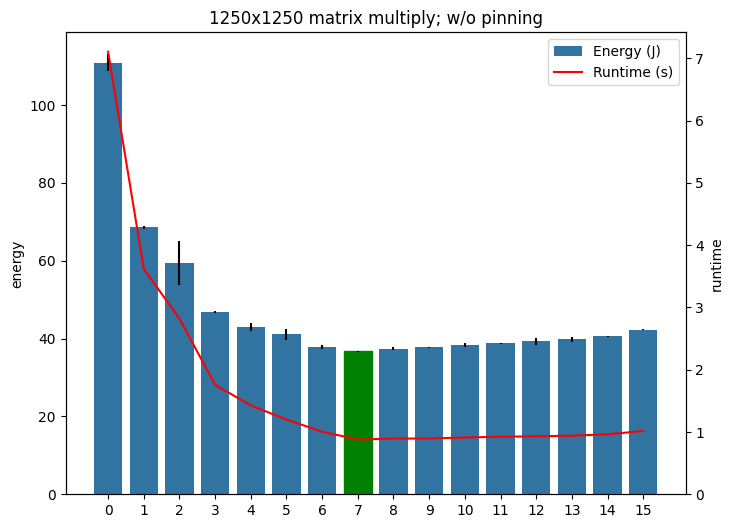

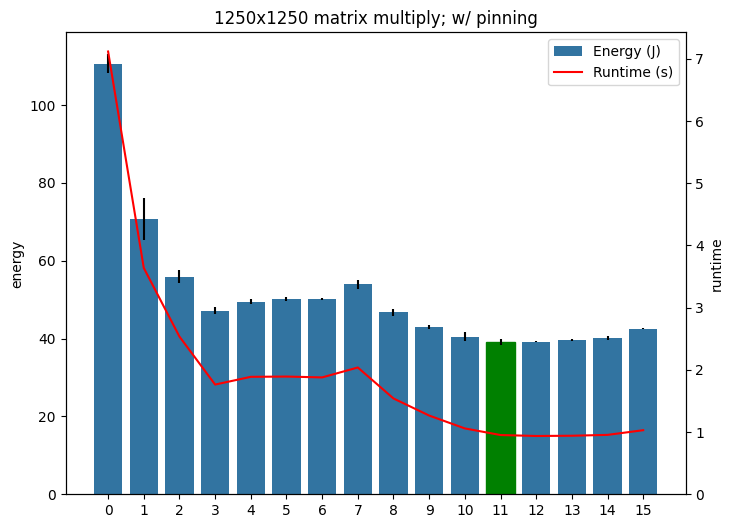

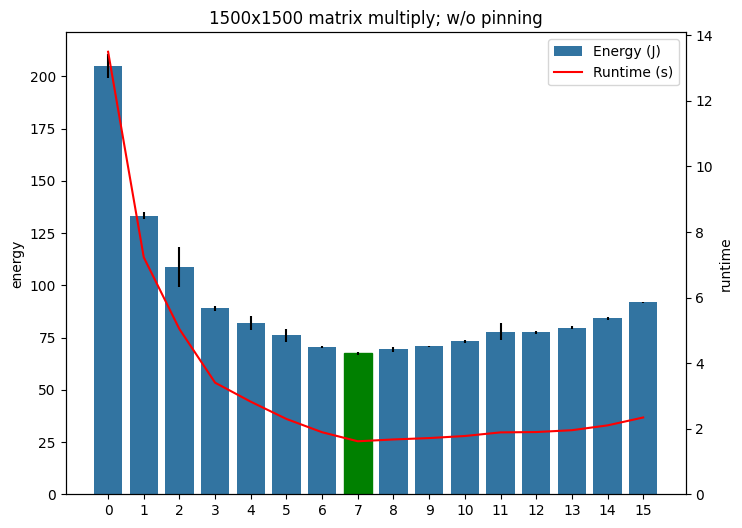

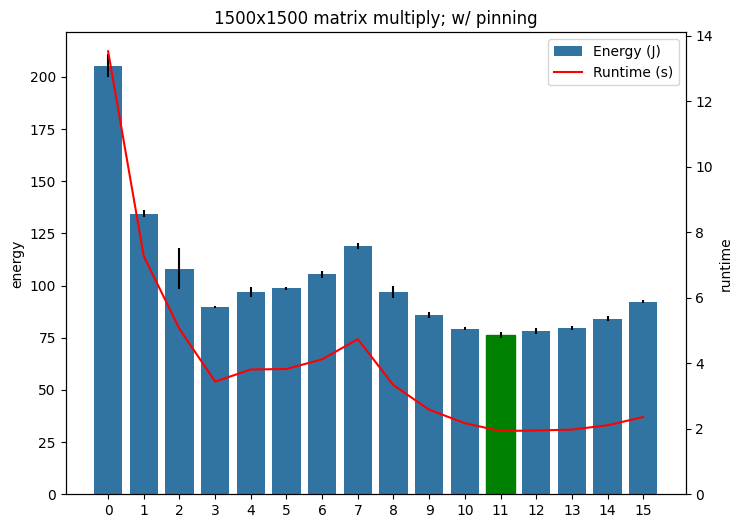

In [9]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['energy'], label='Energy (J)', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['runtime'], label='Runtime (s)', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=dfx['energy'], yerr=dfx['energystd'], fmt='none', c='black')

    for bar in ax.patches:
        if bar.get_height() == dfx['energy'].min():
            bar.set_color('g')
            break

plt.show()

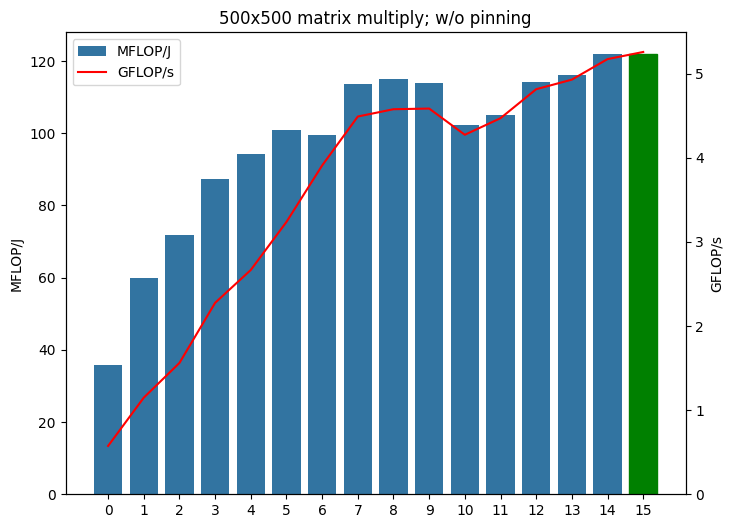

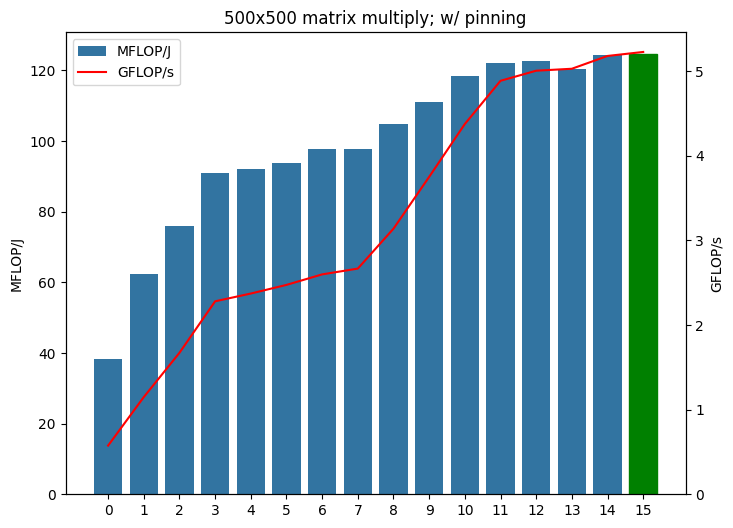

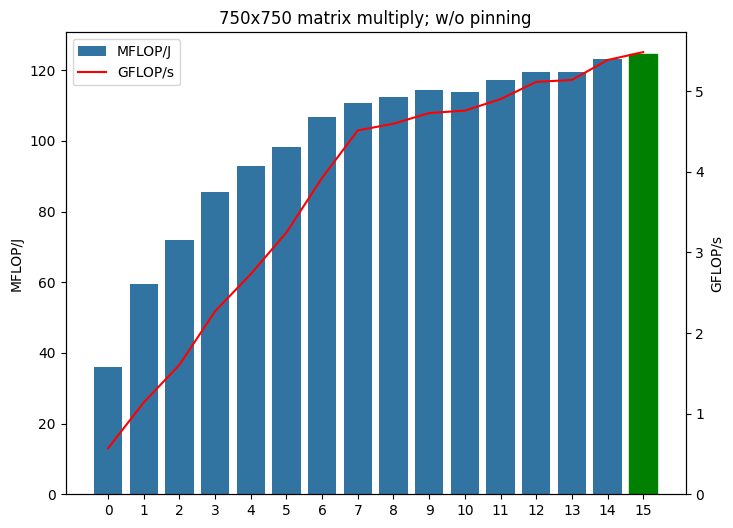

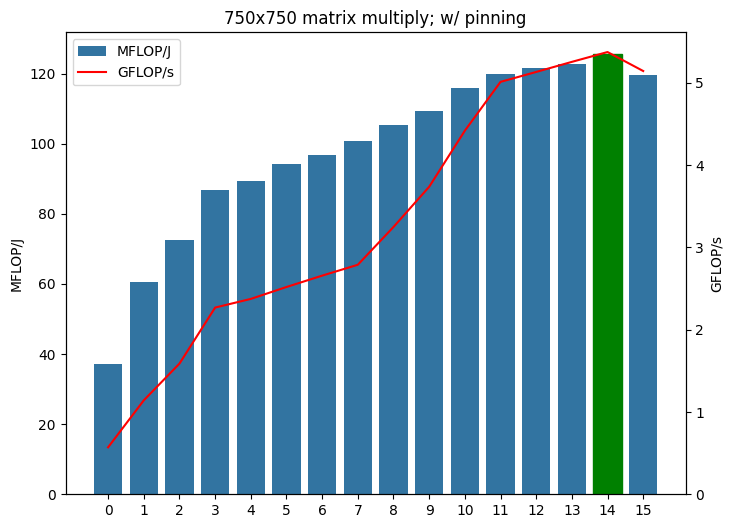

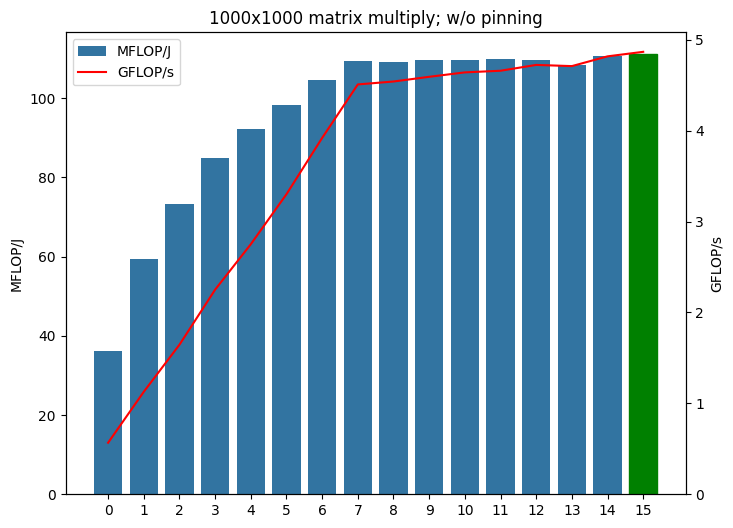

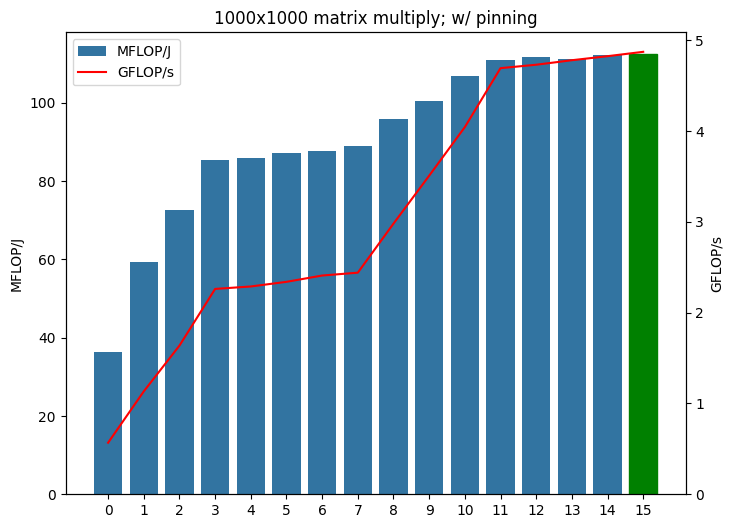

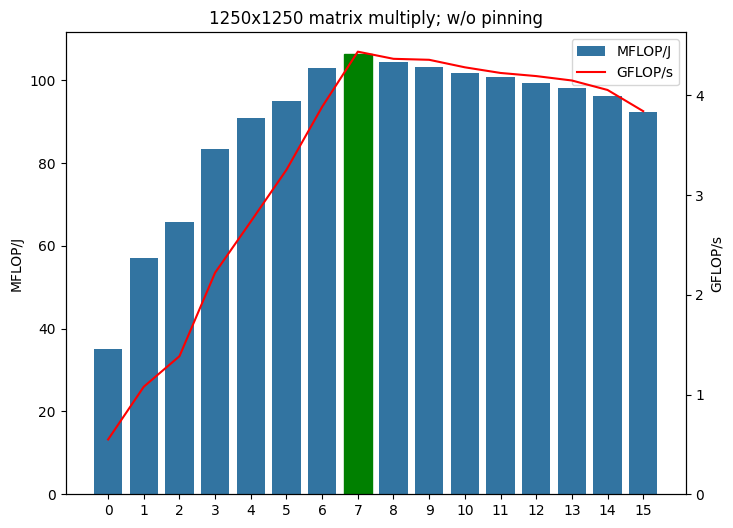

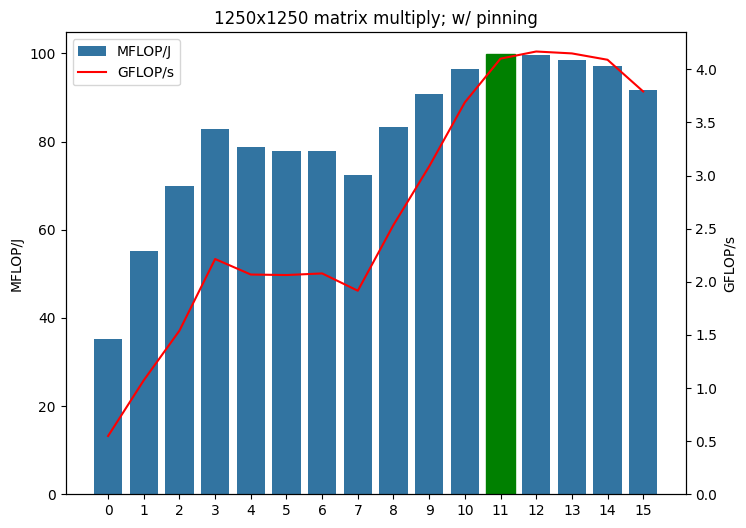

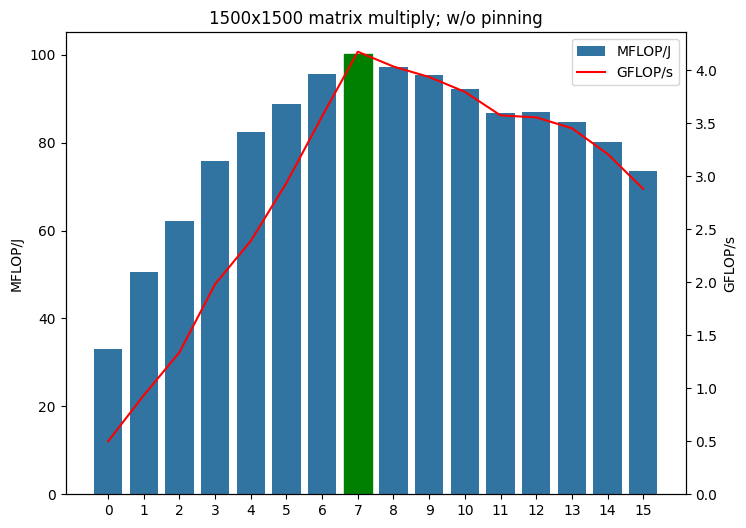

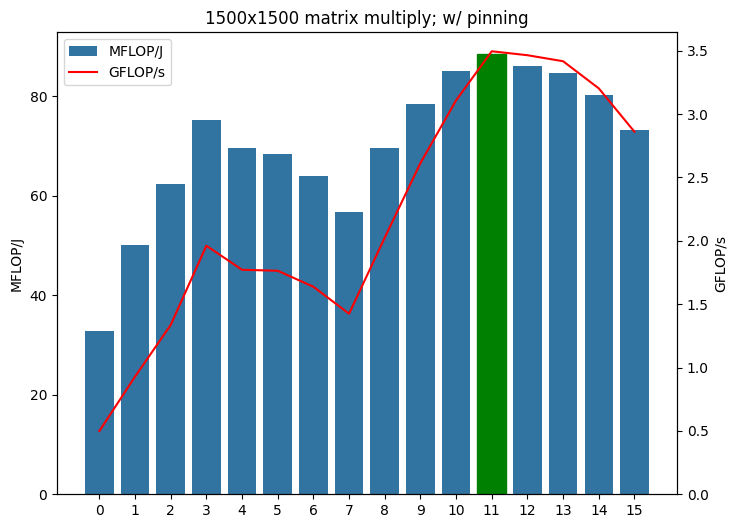

In [8]:
for (size, pin), dfx in df_grouped:
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()

    x = list(range(0, len(dfx)))
    
    ax = sns.barplot(x=x, y=dfx['MFLOP/J'], label='MFLOP/J', legend=False)
    ax2 = ax.twinx()
    sns.lineplot(x=x, y=dfx['GFLOP/s'], label='GFLOP/s', legend=False, color='r', ax=ax2)

    ax.set_title(f'{size}x{size} matrix multiply; {'w/' if pin else 'w/o'} pinning')
    ax2.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    for bar in ax.patches:
        if bar.get_height() == dfx['MFLOP/J'].max():
            bar.set_color('g')
            break

plt.show()